#Diabetes
dataset de clsificacion para predecir la diabestes de un paciente

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot
from scipy import optimize

%matplotlib inline

from sklearn.preprocessing import LabelEncoder

In [3]:
data = pd.read_csv("/content/drive/MyDrive/Inteligencia Artificial 1/Laboratorios/ExamenLab1/weatherAUS.csv")
data

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145455,2017-06-21,Uluru,2.8,23.4,0.0,NaN,NaN,E,31.0,SE,...,51.0,24.0,1024.6,1020.3,NaN,NaN,10.1,22.4,No,No
145456,2017-06-22,Uluru,3.6,25.3,0.0,NaN,NaN,NNW,22.0,SE,...,56.0,21.0,1023.5,1019.1,NaN,NaN,10.9,24.5,No,No
145457,2017-06-23,Uluru,5.4,26.9,0.0,NaN,NaN,N,37.0,SE,...,53.0,24.0,1021.0,1016.8,NaN,NaN,12.5,26.1,No,No
145458,2017-06-24,Uluru,7.8,27.0,0.0,NaN,NaN,SE,28.0,SSE,...,51.0,24.0,1019.4,1016.5,3.0,2.0,15.1,26.0,No,No


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

In [5]:
cols_cat = ['Date','Location','WindGustDir','WindDir9am','WindDir3pm','RainToday','RainTomorrow']
for col in cols_cat:
  print(f'Columna {col}:{data[col].nunique()} subniveles')

Columna Date:3436 subniveles
Columna Location:49 subniveles
Columna WindGustDir:16 subniveles
Columna WindDir9am:16 subniveles
Columna WindDir3pm:16 subniveles
Columna RainToday:2 subniveles
Columna RainTomorrow:2 subniveles


In [6]:
data.describe()
# mirar si "std" es igual a cero -> por si: tienen los mismos valores numericos

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
count,143975.000000,144199.000000,142199.000000,82670.000000,75625.000000,135197.000000,143693.000000,142398.000000,142806.000000,140953.000000,130395.00000,130432.000000,89572.000000,86102.000000,143693.000000,141851.00000
mean,12.194034,23.221348,2.360918,5.468232,7.611178,40.035230,14.043426,18.662657,68.880831,51.539116,1017.64994,1015.255889,4.447461,4.509930,16.990631,21.68339
std,6.398495,7.119049,8.478060,4.193704,3.785483,13.607062,8.915375,8.809800,19.029164,20.795902,7.10653,7.037414,2.887159,2.720357,6.488753,6.93665
min,-8.500000,-4.800000,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,980.50000,977.100000,0.000000,0.000000,-7.200000,-5.40000
25%,7.600000,17.900000,0.000000,2.600000,4.800000,31.000000,7.000000,13.000000,57.000000,37.000000,1012.90000,1010.400000,1.000000,2.000000,12.300000,16.60000
50%,12.000000,22.600000,0.000000,4.800000,8.400000,39.000000,13.000000,19.000000,70.000000,52.000000,1017.60000,1015.200000,5.000000,5.000000,16.700000,21.10000
75%,16.900000,28.200000,0.800000,7.400000,10.600000,48.000000,19.000000,24.000000,83.000000,66.000000,1022.40000,1020.000000,7.000000,7.000000,21.600000,26.40000
max,33.900000,48.100000,371.000000,145.000000,14.500000,135.000000,130.000000,87.000000,100.000000,100.000000,1041.00000,1039.600000,9.000000,9.000000,40.200000,46.70000


In [7]:
#Eliminar filas repetidas
print(f'tamaño antes de filas repetidas: {data.shape}')
data.drop_duplicates(inplace=True)
print(f'tamaño despues de filas repetidas: {data.shape}')

tamaño antes de filas repetidas: (145460, 23)
tamaño despues de filas repetidas: (145460, 23)


In [8]:
# Calcular la cantidad de valores diferentes en una co
valores = data['RainTomorrow'].unique()
print(valores)

['No' 'Yes' nan]


In [9]:
# Suponiendo que 'data' es tu DataFrame y 'RainTomorrow' es la columna que quieres modificar
data['RainTomorrow'] = data['RainTomorrow'].fillna('Yes')
# Verifica los cambios
print(data['RainTomorrow'].unique())

['No' 'Yes']


In [10]:
# Calcular la cantidad de valores diferentes en una co
valores = data['RainToday'].unique()
print(valores)

['No' 'Yes' nan]


In [11]:
# Suponiendo que 'data' es tu DataFrame y 'RainTomorrow' es la columna que quieres modificar
data['RainToday'] = data['RainToday'].fillna('Yes')
# Verifica los cambios
print(data['RainToday'].unique())

['No' 'Yes']


In [12]:
#variables categoricas
columnas_categoricas = data.select_dtypes(include=['object']).columns

In [13]:
#Procesamiento de frases o palabras
for columna in columnas_categoricas:
  le = LabelEncoder()
  data[columna] = le.fit_transform(data[columna])

In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  int64  
 1   Location       145460 non-null  int64  
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    145460 non-null  int64  
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     145460 non-null  int64  
 10  WindDir3pm     145460 non-null  int64  
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

In [15]:
from sklearn.impute import SimpleImputer
# Crear un imputador SimpleImputer para rellenar con la media
imputer = SimpleImputer(strategy='mean')
data.iloc[:, :] = imputer.fit_transform(data)


In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  int64  
 1   Location       145460 non-null  int64  
 2   MinTemp        145460 non-null  float64
 3   MaxTemp        145460 non-null  float64
 4   Rainfall       145460 non-null  float64
 5   Evaporation    145460 non-null  float64
 6   Sunshine       145460 non-null  float64
 7   WindGustDir    145460 non-null  int64  
 8   WindGustSpeed  145460 non-null  float64
 9   WindDir9am     145460 non-null  int64  
 10  WindDir3pm     145460 non-null  int64  
 11  WindSpeed9am   145460 non-null  float64
 12  WindSpeed3pm   145460 non-null  float64
 13  Humidity9am    145460 non-null  float64
 14  Humidity3pm    145460 non-null  float64
 15  Pressure9am    145460 non-null  float64
 16  Pressure3pm    145460 non-null  float64
 17  Cloud9am       145460 non-nul

In [17]:
# Calcular la cantidad de valores diferentes en una co
valores = data['RainToday'].unique()
print(valores)

[0 1]


In [18]:
# Calcular la cantidad de valores diferentes en una co
valores = data['RainTomorrow'].unique()
print(valores)

[0 1]


Separamos los datos- Caracteristicas "**X**" y  Variable objetivo "**y**" para usarlo mas adelante

In [19]:
# Extrae la columna 'RainTomorrow' y la asigna a la variable y
y = data['RainTomorrow'].values
# Elimina la columna 'RainTomorrow' de la matriz X
X = data.drop(columns=['RainTomorrow']).values

In [20]:
# Verificar si hay valores vacíos o nulos en la variable X
nulos_X = np.isnan(X).sum()
nulos_y = np.isnan(y).sum()

print('nulos en X:\n',nulos_X)
print('nulos en y:\n',nulos_y)

nulos en X:
 0
nulos en y:
 0


## **Calaculos**


# Funcion de la Sigmoide

In [21]:
def calcularSigmoide(z):
    # Calcula la sigmoide de una entrada z
    # convierte la intrada a un arreglo numpy
    z = np.array(z)

    g = np.zeros(z.shape)

    g = 1 / (1 + np.exp(-z))

    return g

agregamos la una primera columna de unos

In [22]:
# Configurar la matriz adecuadamente, y agregar una columna de unos que corresponde al termino de intercepción.
m, n = X.shape
# Agraga el termino de intercepción a A
X = np.concatenate([np.ones((m, 1)), X], axis=1)

In [23]:
#Revisamos
X

array([[1.000e+00, 3.960e+02, 2.000e+00, ..., 1.690e+01, 2.180e+01,
        0.000e+00],
       [1.000e+00, 3.970e+02, 2.000e+00, ..., 1.720e+01, 2.430e+01,
        0.000e+00],
       [1.000e+00, 3.980e+02, 2.000e+00, ..., 2.100e+01, 2.320e+01,
        0.000e+00],
       ...,
       [1.000e+00, 3.433e+03, 4.100e+01, ..., 1.250e+01, 2.610e+01,
        0.000e+00],
       [1.000e+00, 3.434e+03, 4.100e+01, ..., 1.510e+01, 2.600e+01,
        0.000e+00],
       [1.000e+00, 3.435e+03, 4.100e+01, ..., 1.500e+01, 2.090e+01,
        0.000e+00]])

## Normalizamos
nota: siempre normalizar

In [24]:
from sklearn.preprocessing import StandardScaler
# Crea un objeto StandardScaler
scaler = StandardScaler()
# Ajusta y transforma toda la matriz de características
X_norm = scaler.fit_transform(X)

In [25]:
# Revisamos
X_norm

array([[ 0.        , -1.73164014, -1.53166617, ..., -0.01405313,
         0.01702323, -0.56439337],
       [ 0.        , -1.73051017, -1.53166617, ...,  0.03246428,
         0.38198495, -0.56439337],
       [ 0.        , -1.72938021, -1.53166617, ...,  0.62168477,
         0.22140179, -0.56439337],
       ...,
       [ 0.        ,  1.7000566 ,  1.20928479, ..., -0.69630843,
         0.64475739, -0.56439337],
       [ 0.        ,  1.70118656,  1.20928479, ..., -0.29315757,
         0.63015892, -0.56439337],
       [ 0.        ,  1.70231653,  1.20928479, ..., -0.30866337,
        -0.11436299, -0.56439337]])

# Funcion Costo Gradiente

# Funcion de costo en una regresion logistica

In [26]:
def calcularCosto(theta, X, y):
    # Inicializar algunos valores utiles
    m = y.size  # numero de ejemplos de entrenamiento

    J = 0
    h = calcularSigmoide(X.dot(theta.T))
    J = (1 / m) * np.sum(-y.dot(np.log(h)) - (1 - y).dot(np.log(1 - h)))

    return J

In [27]:
def calcularCostoR(theta, X, y, lambda_):
    m = y.size
    h = calcularSigmoide(X.dot(theta.T))
    reg_term = (lambda_ / (2 * m)) * np.sum(np.square(theta[1:]))
    J = (1 / m) * np.sum(-y.dot(np.log(h)) - (1 - y).dot(np.log(1 - h))) + reg_term
    return J

# Funcion de Descenso por el Gradiente

La REGULARIZACION SOLO CAMBIA LA FUNCION DE COSTO

In [28]:
def descensoGradiente(theta, X, y, alpha, num_iters):
    # Inicializa algunos valores
    m = y.shape[0] # numero de ejemplos de entrenamiento

    # realiza una copia de theta, el cual será acutalizada por el descenso por el gradiente
    theta = theta.copy()
    J_history = []

    for i in range(num_iters):
        h = calcularSigmoide(X.dot(theta.T))
        theta = theta - (alpha / m) * (h - y).dot(X)

        J_history.append(calcularCosto(theta, X, y))
    return theta, J_history

In [29]:
def descensoGradienteR(theta, X, y, alpha, lambda_, num_iters):
    m = y.shape[0]
    theta = theta.copy()
    J_history = []
    for i in range(num_iters):
        h = calcularSigmoide(X.dot(theta.T))
        reg_term = (lambda_ / m) * theta[1:]
        theta[0] = theta[0] - (alpha / m) * (h - y).dot(X[:, 0])
        theta[1:] = theta[1:] * (1 - alpha * (lambda_ / m)) - (alpha / m) * (h - y).dot(X[:, 1:])
        theta[1:] = theta[1:] - reg_term
        J_history.append(calcularCostoR(theta, X, y, lambda_))
    return theta, J_history

Separar el 80% de los datos para entrenamiento y el 20% para hacer las pruebas

In [30]:
from sklearn.model_selection import train_test_split
# Dividir los datos en conjuntos de entrenamiento y prueba (80% entrenamiento, 20% prueba)
X_train, X_test, y_train, y_test = train_test_split(X_norm, y, test_size=0.2, random_state=42)

# Configuracion de Hiperparametros para el entrenamiento del Modelo

theta calculado por el descenso por el gradiente: 
 [ 0.          0.00101845  0.00214778  0.04975047 -0.04197374  0.13280466
 -0.00910261 -0.18365491  0.01270902  0.20096038 -0.04445436 -0.00826331
  0.02391517 -0.02693045  0.09730073  0.33249458 -0.11077316 -0.1638658
  0.03603869  0.13137562  0.02985775 -0.06612897  0.21461657]
con un costo de: 0.5785094274552445 


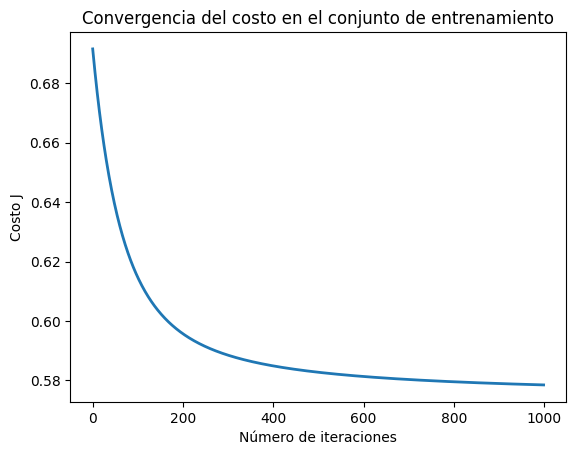

In [43]:
# Configurar hiperparámetros y realizar descenso por el gradiente en el conjunto de entrenamiento
alpha = 0.01
num_iters = 1000       #con 500 iteraciones ya tenemos una buena convergencia
lambda_= 100
theta = np.zeros(23)

#theta, J_history = descensoGradiente(theta, X_train, y_train, alpha, num_iters)

theta, J_history = descensoGradienteR(theta, X_train, y_train, alpha,lambda_, num_iters)

# Muestra los resultados del descenso por el gradiente
print('theta calculado por el descenso por el gradiente: \n',(theta))


# Graficar la convergencia del costo en el conjunto de entrenamiento
pyplot.plot(np.arange(len(J_history)), (J_history), lw=2)

print(f"con un costo de: { J_history[-1]} ")

pyplot.xlabel('Número de iteraciones')
pyplot.ylabel('Costo J')
pyplot.title('Convergencia del costo en el conjunto de entrenamiento')
pyplot.show()


In [44]:
#Revisamos las dimensiones de X_normalizada
print(X_norm.shape)

(145460, 23)


In [45]:
#Revisamos las dimensiones de Theta
tita = pd.DataFrame(theta)
print(tita.shape)

(23, 1)


# Funcion para calcular la precision de las predicciones

In [46]:
def calcularPrecision(predictions, labels):
    # Convertir predicciones a etiquetas binarias (0 o 1)
    predictions_binary = (predictions >= 0.5).astype(int)

    # Calcular la precisión
    correct_predictions = np.sum(predictions_binary == labels)
    total_examples = len(labels)
    precision = correct_predictions / total_examples

    return precision

Y por ultimo Hacemos las predicciones con el otro 20% de datos faltantes para la evaluacion del Modelo

In [47]:
# Realizar predicciones en el conjunto de prueba
y_predicha = calcularSigmoide(np.dot(X_train, theta))

# Calcular la precisión utilizando la función calcularPrecision
precision_entrenamiento = calcularPrecision(y_predicha, y_train)

# Contar el número total de predicciones correctas
total_correct_predictions = np.sum((y_predicha >= 0.5).astype(int) == y_train)
total_incorrect_predictions = np.sum((y_predicha < 0.5).astype(int) == y_train)

# Imprimir resultados de las pruebas en el conjunto de prueba
print('Resultados en el conjunto de entrenamiento:')
print(f'Número total de predicciones correctas: {total_correct_predictions}')
print(f'Número total de predicciones incorrectas: {total_incorrect_predictions}')
print(f'Porcentaje de precisión: {precision_entrenamiento:.2%}')

Resultados en el conjunto de entrenamiento:
Número total de predicciones correctas: 83585
Número total de predicciones incorrectas: 32783
Porcentaje de precisión: 71.83%


In [48]:
# Realizar predicciones en el conjunto de prueba
y_predicha = calcularSigmoide(np.dot(X_test, theta))

# Calcular la precisión utilizando la función calcularPrecision
precision_test = calcularPrecision(y_predicha, y_test)

# Contar el número total de predicciones correctas
total_correct_predictions = np.sum((y_predicha >= 0.5).astype(int) == y_test)
total_incorrect_predictions = np.sum((y_predicha < 0.5).astype(int) == y_test)

# Imprimir resultados de las pruebas en el conjunto de prueba
print('Resultados en el conjunto de prueba:')
print(f'Número total de predicciones correctas: {total_correct_predictions}')
print(f'Número total de predicciones incorrectas: {total_incorrect_predictions}')
print(f'Porcentaje de precisión: {precision_test:.2%}')

Resultados en el conjunto de prueba:
Número total de predicciones correctas: 20928
Número total de predicciones incorrectas: 8164
Porcentaje de precisión: 71.94%
